## Classifying cars using decision tree classifier

##### Importing libraries

In [27]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline

##### Importing and shuffling the data

In [2]:
df = pd.read_csv('C:/Users/Nicolas/Documents/Scraping/thecarconnection/raw_data_imputed.csv', 
                 index_col=0).sample(frac=1, random_state=42)

In [3]:
df.head()

,Make,Model,MSRP,Style Name,Drivetrain,Passenger Capacity,Passenger Doors,Body Style,EPA Classification,Base Curb Weight (lbs),...,Displacement (cc),Rear Tire Width,Front Tire Width,Rear Wheel Size,Front Wheel Size,Tire Rating,Tire Width Ratio,Wheel Size Ratio,Tire Ratio,Year
2016 Ford Expedition Specs: 4WD 4-Door King Ranch,Ford,Expedition,62295.0,4WD 4dr King Ranch,Four Wheel Drive,8.0,4,Sport Utility,Small Sport Utility Vehicles 4WD,3905.44,...,213.0,275.0,275.0,20.0,20.0,S,1.000000,1.0,5.0,2016.0
2016 Subaru Crosstrek Specs: 5-Door Touring,Subaru,Crosstrek,29995.0,Touring CVT,All Wheel Drive,5.0,4,Sport Utility,Small Sport Utility Vehicles 4WD,3495.00,...,122.0,225.0,225.0,17.0,17.0,H,1.000000,1.0,5.0,2016.0
2018 Porsche 911 Specs: Turbo Coupe,Porsche,911,161800.0,Turbo Coupe,All Wheel Drive,4.0,2,2dr Car,Minicompact Cars,3516.00,...,232.0,305.0,245.0,20.0,20.0,Y,1.244898,1.0,3.0,2018.0
2017 Volvo XC90 Specs: T5 AWD 5-Passenger Momentum,Volvo,XC90,47950.0,T5 AWD 5-Passenger Momentum,All Wheel Drive,5.0,4,Sport Utility,Small Sport Utility Vehicles 4WD,4394.00,...,120.0,235.0,235.0,18.0,18.0,H,1.000000,1.0,6.0,2017.0
2017 Mercedes-Benz SL Class Specs: SL 550 Roadster,Mercedes-Benz,SL Class,110800.0,SL 550,Rear Wheel Drive,2.0,2,Convertible,Two-Seaters,3959.00,...,285.0,285.0,255.0,19.0,19.0,Y,1.117647,1.0,3.0,2017.0


##### Balancing the data

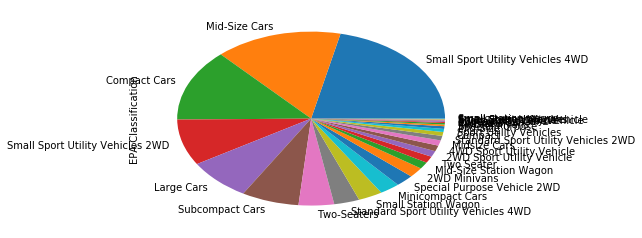

In [4]:
df['EPA Classification'].value_counts().plot(kind='pie')

In [5]:
df['EPA Classification'].value_counts().head(10)

Small Sport Utility Vehicles 4WD       1650
Mid-Size Cars                          1177
Compact Cars                           1029
Small Sport Utility Vehicles 2WD        659
Large Cars                              598
Subcompact Cars                         534
Two-Seaters                             329
Standard Sport Utility Vehicles 4WD     236
Small Station Wagon                     226
Minicompact Cars                        188
Name: EPA Classification, dtype: int64

That's too unbalanced!

In [6]:
small_utility_awd = df.loc[df['EPA Classification'] == 'Small Sport Utility Vehicles 4WD'].sample(n=500, random_state=42)
midsized_car = df.loc[df['EPA Classification'] == 'Mid-Size Cars'].sample(n=500, random_state=42)
compact_car = df.loc[df['EPA Classification'] == 'Compact Cars'].sample(n=500, random_state=42)
small_utility_fwd = df.loc[df['EPA Classification'] == 'Small Sport Utility Vehicles 2WD'].sample(n=500, random_state=42)
large_cars = df.loc[df['EPA Classification'] == 'Large Cars'].sample(n=500, random_state=42)
subcompact_cars = df.loc[df['EPA Classification'] == 'Subcompact Cars'].sample(n=500, random_state=42)

In [7]:
df = pd.concat([small_utility_awd, small_utility_fwd, compact_car, midsized_car, 
                large_cars, subcompact_cars], axis=0, sort=False).sample(frac=1, random_state=42).reset_index(drop=True)

In [8]:
df.head()

,Make,Model,MSRP,Style Name,Drivetrain,Passenger Capacity,Passenger Doors,Body Style,EPA Classification,Base Curb Weight (lbs),...,Displacement (cc),Rear Tire Width,Front Tire Width,Rear Wheel Size,Front Wheel Size,Tire Rating,Tire Width Ratio,Wheel Size Ratio,Tire Ratio,Year
0,Kia,Forte5,23900.0,SX DCT,Front Wheel Drive,5.0,4,4dr Car,Mid-Size Cars,2898.0,...,97.0,225.0,225.0,18.0,18.0,H,1.000000,1.0,4.0,2018.0
1,Jaguar,XE,38325.0,25t Premium RWD,Rear Wheel Drive,5.0,4,4dr Car,Compact Cars,3395.0,...,122.0,225.0,225.0,17.0,17.0,H,1.000000,1.0,5.0,2018.0
2,Audi,S7,81200.0,4.0 TFSI Premium Plus,All Wheel Drive,4.0,4,4dr Car,Mid-Size Cars,4486.0,...,244.0,265.0,265.0,20.0,20.0,Y,1.000000,1.0,3.0,2018.0
3,Alfa Romeo,Stelvio Quadrifoglio,79795.0,AWD,All Wheel Drive,5.0,4,Sport Utility,Small Sport Utility Vehicles 4WD,4360.0,...,176.0,285.0,255.0,20.0,20.0,Y,1.117647,1.0,4.0,2018.0
4,Volkswagen,Beetle Convertible,25490.0,2dr Auto 1.8T S,Front Wheel Drive,4.0,2,Convertible,Subcompact Cars,3225.0,...,110.0,215.0,215.0,17.0,17.0,H,1.000000,1.0,5.0,2016.0


In [9]:
df.shape

(3000, 94)

In [10]:
df['EPA Classification'].value_counts()

Mid-Size Cars                       500
Small Sport Utility Vehicles 4WD    500
Subcompact Cars                     500
Compact Cars                        500
Small Sport Utility Vehicles 2WD    500
Large Cars                          500
Name: EPA Classification, dtype: int64

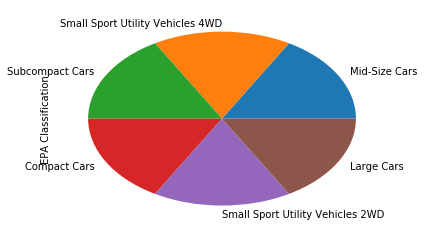

In [11]:
df['EPA Classification'].value_counts().plot(kind='pie')

##### Separating the label from the predictor variables

In [12]:
X = df.loc[:, ['MSRP', 'Drivetrain', 'Passenger Capacity', 'Passenger Doors', 
               'Width, Max w/o mirrors (in)', 'Track Width, Rear (in)',
               'Height, Overall (in)', 'Wheelbase (in)', 'Track Width, Front (in)',
               'Fuel Tank Capacity, Approx (gal)', 'EPA Fuel Economy Est - City (MPG)',
               'EPA Fuel Economy Est - Hwy (MPG)', 'Gears', 'Net Horsepower', 'Net Horsepower RPM', 
               'Net Torque', 'Net Torque RPM', 'Cylinders', 'Engine Configuration', 'Engine Class',
               'Displacement (L)', 'Displacement (cc)', 'Rear Tire Width',
               'Front Tire Width', 'Rear Wheel Size', 'Front Wheel Size',
               'Tire Rating', 'Tire Width Ratio', 'Wheel Size Ratio', 'Tire Ratio']]
y = df['EPA Classification']

##### One hot encoding certain features

In [13]:
specs_to_dummies = ['Drivetrain', 'Engine Configuration', 'Engine Class', 'Tire Rating']

for item in specs_to_dummies:
    dummies = pd.get_dummies(X[item], prefix_sep=': ', prefix=item)
    X = X.drop(item, axis=1)
    X = pd.concat([X, dummies], sort=False, axis=1)

In [14]:
X.columns

Index(['MSRP', 'Passenger Capacity', 'Passenger Doors',
       'Width, Max w/o mirrors (in)', 'Track Width, Rear (in)',
       'Height, Overall (in)', 'Wheelbase (in)', 'Track Width, Front (in)',
       'Fuel Tank Capacity, Approx (gal)', 'EPA Fuel Economy Est - City (MPG)',
       'EPA Fuel Economy Est - Hwy (MPG)', 'Gears', 'Net Horsepower',
       'Net Horsepower RPM', 'Net Torque', 'Net Torque RPM', 'Cylinders',
       'Displacement (L)', 'Displacement (cc)', 'Rear Tire Width',
       'Front Tire Width', 'Rear Wheel Size', 'Front Wheel Size',
       'Tire Width Ratio', 'Wheel Size Ratio', 'Tire Ratio',
       'Drivetrain: All Wheel Drive', 'Drivetrain: Four Wheel Drive',
       'Drivetrain: Front Wheel Drive', 'Drivetrain: Rear Wheel Drive',
       'Engine Configuration: E', 'Engine Configuration: H',
       'Engine Configuration: I', 'Engine Configuration: V',
       'Engine Configuration: W', 'Engine Class: Electric',
       'Engine Class: Gas', 'Engine Class: Gas/Electric',
    

##### Splitting the data

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

##### Training the model

In [16]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

##### Making predictions

In [17]:
y_pred = clf.predict(X_test)

In [18]:
accuracy_score(y_test, y_pred)

0.9583333333333334

Amazing accuracy.

##### Getting info about parameters

In [19]:
features = pd.DataFrame(clf.feature_importances_)

In [20]:
features_importances = pd.concat([pd.DataFrame(X.columns), features], axis=1, sort=False)
features_importances.columns = ['Feature', 'Importance']
features_importances.sort_values(by='Importance', ascending=False).reset_index(drop=True).head(15)

,Feature,Importance
0,"Height, Overall (in)",0.273828
1,Drivetrain: Front Wheel Drive,0.174539
2,"Fuel Tank Capacity, Approx (gal)",0.107028
3,"Track Width, Rear (in)",0.092047
4,Passenger Capacity,0.085422
5,"Width, Max w/o mirrors (in)",0.033786
6,Wheelbase (in),0.032718
7,Net Torque RPM,0.026748
8,MSRP,0.026052
9,"Track Width, Front (in)",0.025407


In [29]:
pd.DataFrame(confusion_matrix(y_test, y_pred), columns=np.unique(df['EPA Classification'].values), 
             index=np.unique(df['EPA Classification'].values))

,Compact Cars,Large Cars,Mid-Size Cars,Small Sport Utility Vehicles 2WD,Small Sport Utility Vehicles 4WD,Subcompact Cars
Compact Cars,85,2,2,0,0,2
Large Cars,0,106,2,0,0,0
Mid-Size Cars,9,2,84,1,0,0
Small Sport Utility Vehicles 2WD,0,1,0,107,1,0
Small Sport Utility Vehicles 4WD,0,0,0,2,102,0
Subcompact Cars,1,0,0,0,0,91


We can see that mid-sized cars are somewhat often mistaken for compact cars.